In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv('ds_salaries.csv')
data = df.copy()

In [22]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [23]:
data.shape

(3755, 11)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [25]:
data.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [26]:
data.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [27]:
col = ['work_year', 'experience_level', 'employment_type', 'job_title' , 'employee_residence', 'company_location','company_size']

for a in col:
    data[a]=data[a].astype('category')
    

In [28]:
# data.duplicated().sum()

In [29]:
# data.drop_duplicates(inplace=True)

In [30]:
data.dtypes

work_year             category
experience_level      category
employment_type       category
job_title             category
salary                   int64
salary_currency         object
salary_in_usd            int64
employee_residence    category
remote_ratio             int64
company_location      category
company_size          category
dtype: object

In [31]:
data.drop(['salary', 'salary_currency'], axis=1, inplace=True)

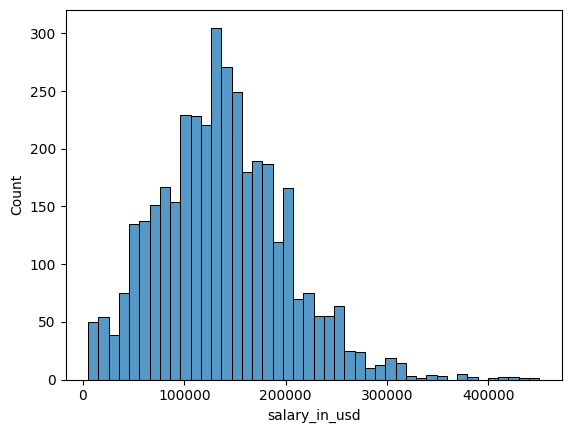

In [32]:
sns.histplot(data=data, x='salary_in_usd')
plt.show()

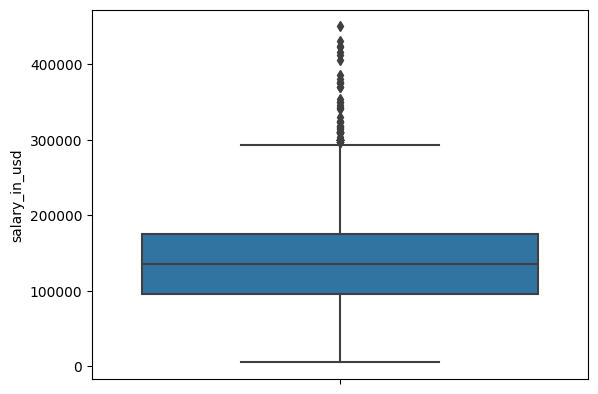

In [33]:
sns.boxplot(data=data, y='salary_in_usd')
plt.show()

In [35]:
jobs=data['job_title'].value_counts()
jobs

job_title
Data Engineer                1040
Data Scientist                840
Data Analyst                  612
Machine Learning Engineer     289
Analytics Engineer            103
                             ... 
Compliance Data Analyst         1
Cloud Data Architect            1
BI Data Engineer                1
Azure Data Engineer             1
Staff Data Scientist            1
Name: count, Length: 93, dtype: int64

In [41]:
top15_jobs=jobs[:15]
top15_jobs

job_title
Data Engineer                 1040
Data Scientist                 840
Data Analyst                   612
Machine Learning Engineer      289
Analytics Engineer             103
Data Architect                 101
Research Scientist              82
Data Science Manager            58
Applied Scientist               58
Research Engineer               37
ML Engineer                     34
Data Manager                    29
Machine Learning Scientist      26
Data Science Consultant         24
Data Analytics Manager          22
Name: count, dtype: int64

In [43]:
job_title=['Data Engineer','Data Scientist', 'Data Analyst','ML Engineer', 'Analytics Engineer','Data Architect','Research Scientist', 'DS Manager', 'Applied Scientist','Research Engineer', 'ML Enginer', 'Data Manager','ML Scientist','DS Consultant','DA Manager']
counts=np.array(top15_jobs)

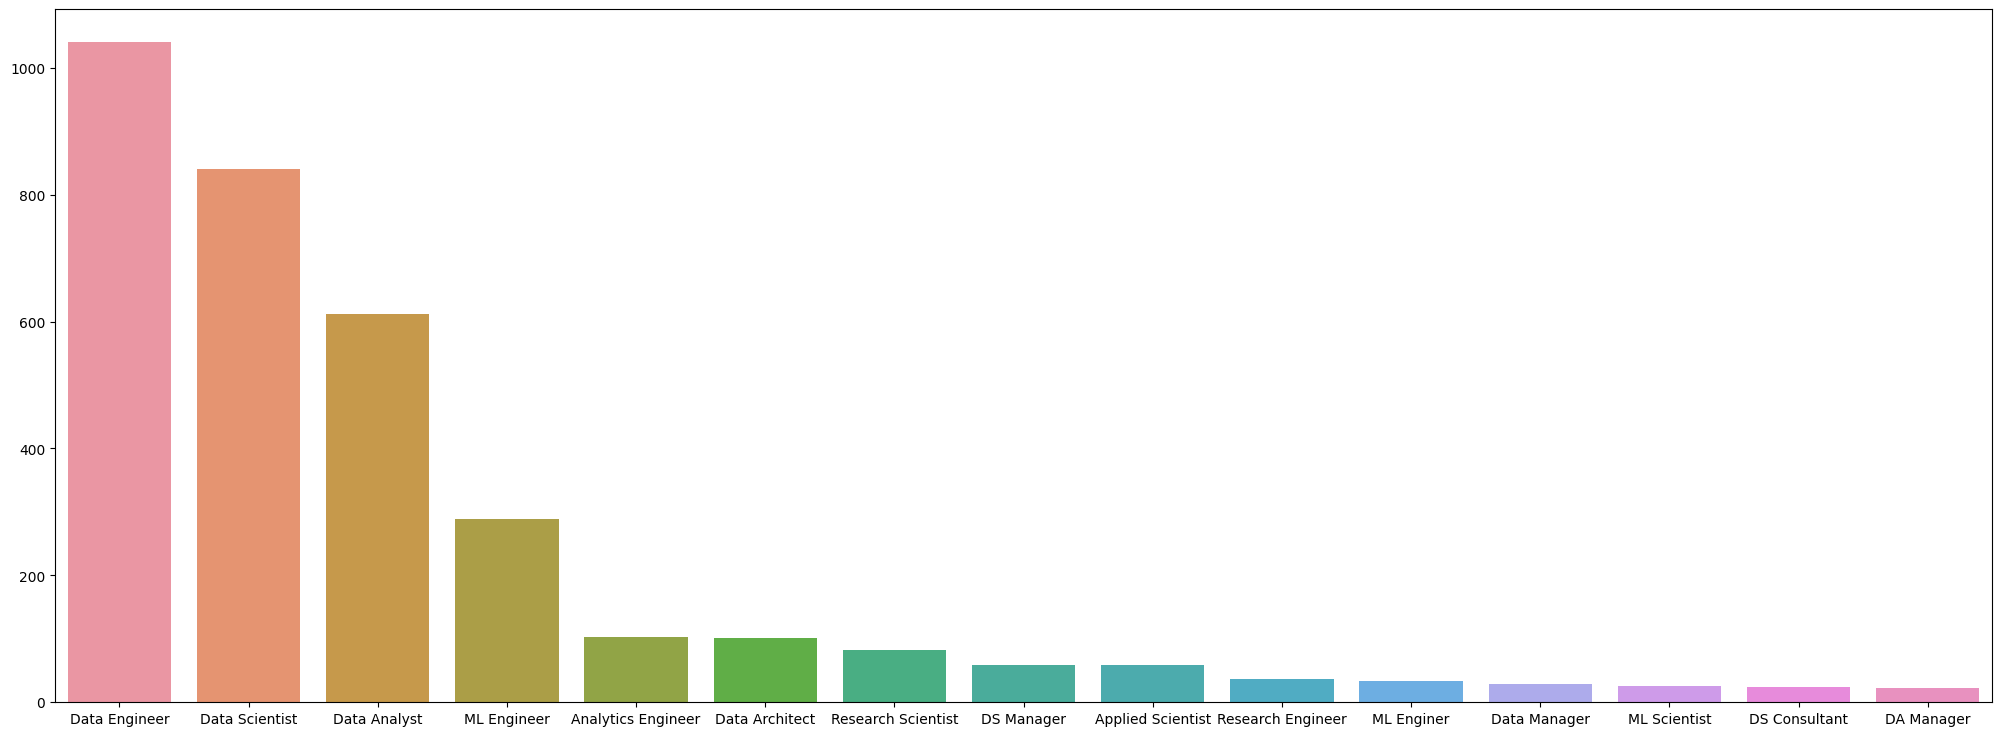

In [44]:
plt.figure(figsize=(25,9))
sns.barplot(x=job_title,y=counts)
plt.show()

In [46]:
exp_wise_salary=np.array(data['salary_in_usd'].groupby(data['experience_level']) .mean())

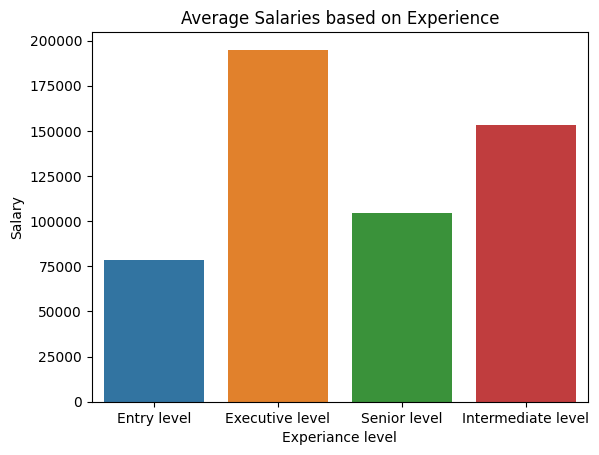

In [47]:
plt.title("Average Salaries based on Experience")
plt.xlabel('Experiance level')
plt.ylabel('Salary')
sns.barplot(x=['Entry level', 'Executive level', 'Senior level', 'Intermediate level'],y=exp_wise_salary)
plt.show()

In [48]:
employ_wise_salary=np.array(df['salary_in_usd'].groupby(df['employment_type']) .mean())

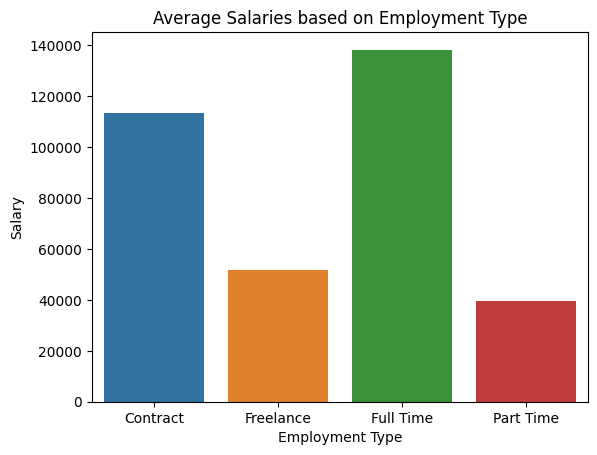

In [49]:
plt.title("Average Salaries based on Employment Type")
plt.xlabel('Employment Type')
plt.ylabel('Salary')
sns.barplot(x=['Contract', 'Freelance', 'Full Time', 'Part Time'],y=employ_wise_salary)
plt.show()

In [50]:
compsize_based_salary=np.array(data['salary_in_usd'].groupby(data['company_size']) .mean())
compsize_based_title=['Large', 'Medium', 'Small']

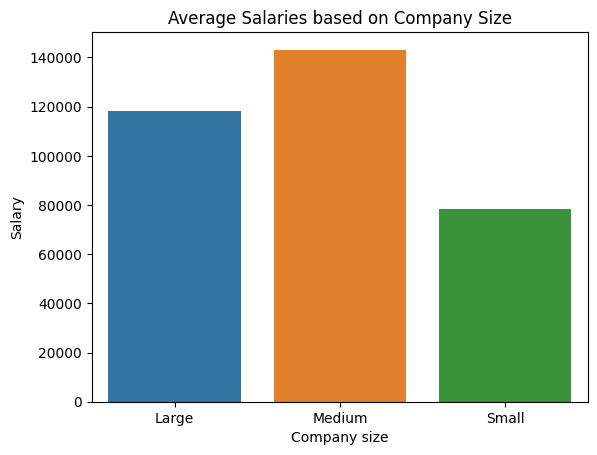

In [51]:
plt.title("Average Salaries based on Company Size")
plt.xlabel('Company size')
plt.ylabel('Salary')
sns.barplot(x=compsize_based_title,y=compsize_based_salary)
plt.show()

In [52]:
year_based_salary=np.array(df['salary_in_usd'].groupby(df['work_year']) .mean())

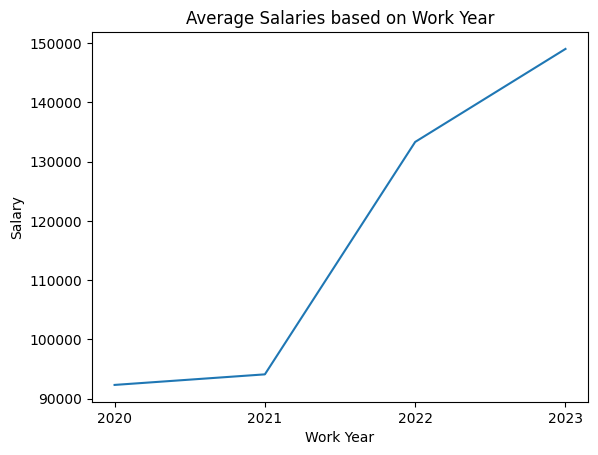

In [53]:
plt.title("Average Salaries based on Work Year")
plt.xlabel('Work Year')
plt.ylabel('Salary')
sns.lineplot(x=['2020', '2021', '2022','2023'],y=year_based_salary)
plt.show()

In [55]:
from sklearn.model_selection import train_test_split

features = data.drop("salary_in_usd", axis=1)
target = data['salary_in_usd'].values

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42) 

In [61]:
from sklearn.preprocessing import LabelEncoder

e = LabelEncoder()

for col in data.columns.to_list():
    if data[col].dtype == 'category':
        data[col] = le.fit_transform(data[col])
        


In [63]:
from sklearn.pipeline   import Pipeline as pipe
from sklearn.preprocessing import StandardScaler
pipe = pipe([ ('StandardScaler', StandardScaler())])

X_train = pipe.fit_transform(X_train)
X_test = pipe.transform(X_test)
   

In [65]:
from sklearn.neighbors import KNeighborsRegressor

reg_knn = KNeighborsRegressor(n_neighbors=5)
reg_knn.fit(X_train, y_train)

KNeighborsRegressor()

In [66]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error


reg_knn_preds = reg_knn.predict(X_test)
mae = mean_abs_error(y_test, reg_knn_preds)
rmse = root_mean_squared_error(y_test, reg_knn_preds)
r2score = r2_score(y_test, reg_knn_preds)

printf'("the mean abs error of the model is {}"{(mae)})
print("the root mean squared error of the model is {}".format(rmse))
print("the r2 score of the model is {}".format(r2score))

the mean abs error of the model is 39509.520639147806
the root mean squared error of the model is 51521.31304756502
the r2 score of the model is 0.32761220612219244


In [67]:
from sklearn.model_selection import GridSearchCV

params = {'n_neighbors':list(range(2, 20)),
         'weights':['uniform', 'distance']}

grid_reg_knn_model = GridSearchCV(reg_knn, params, cv=3)
grid_reg_knn_model.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19],
                         'weights': ['uniform', 'distance']})

In [68]:
grid_reg_knn_model.best_params_

{'n_neighbors': 18, 'weights': 'distance'}

In [69]:
grid_reg_knn_model.best_estimator_.score(X_test, y_test)

0.3518715993252868

In [70]:


predictions = grid_reg_knn_model.best_estimator_.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
rmse = root_mean_squared_error(y_test, predictions)
r2score = r2_score(y_test, predictions)

print("the mean abs error of the model is {}".format(mae))
print("the root mean squared error of the model is {}".format(rmse))
print("the r2 score of the model is {}".format(r2score))

the mean abs error of the model is 38373.47010883274
the root mean squared error of the model is 50583.34421767761
the r2 score of the model is 0.3518715993252868


In [71]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [72]:
lr_predictions = lr.predict(X_test)

mae = mean_absolute_error(y_test, lr_predictions)
rmse = root_mean_squared_error(y_test, lr_predictions)
r2score = r2_score(y_test, lr_predictions)

print("the mean abs error of the model is {}".format(mae))
print("the root mean squared error of the model is {}".format(rmse))
print("the r2 score of the model is {}".format(r2score))

the mean abs error of the model is 41582.71615452879
the root mean squared error of the model is 53380.685006756416
the r2 score of the model is 0.2782043496313762


In [73]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=20)
dt.fit(X_train, y_train)

dt_predictions = dt.predict(X_test)

mae = mean_absolute_error(y_test, dt_predictions)
rmse = root_mean_squared_error(y_test, dt_predictions)
r2score = r2_score(y_test, dt_predictions)

print("the mean abs error of the model is {}".format(mae))
print("the root mean squared error of the model is {}".format(rmse))
print("the r2 score of the model is {}".format(r2score))

the mean abs error of the model is 39071.65472881689
the root mean squared error of the model is 52594.5897234335
the r2 score of the model is 0.2993064515888765
